# Steepest descent and CG
Lecture demos from November 14-16.

In [1]:
using Plots

Generate a random quadratic with a presecribed condition number.

In [ ]:
n = 2
Q,R = qr(randn(n,n),thin=false)
D = diagm([10,1])
A = Q*D*Q'

Plot the contours.


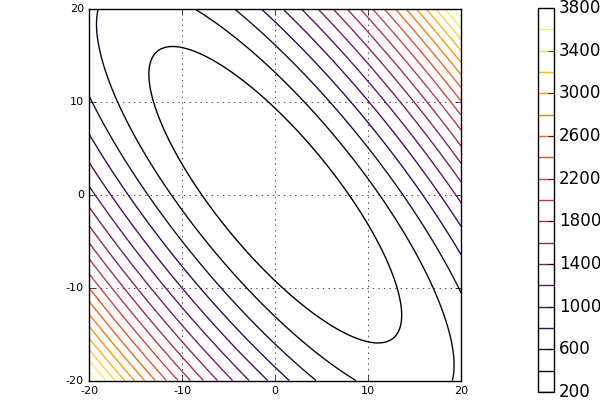

In [95]:
# quadratic function of 2 vars
q = (x,y)->x*A[1,1]*x/2 + y*A[2,2]*y/2 + x*A[1,2]*y

x = linspace(-20,20,100)
y = linspace(-20,20,100)
contour(x,y,q,aspect_ratio=:equal,levels=20)

In [61]:
eigvals(A)

2-element Array{Float64,1}:
 10.0
  1.0

Now generate a bigger problem with a corresponding RHS.

In [96]:
n = 100
Q,R = qr(randn(n,n),thin=false)
D = diagm(linspace(1,100,n))
A = Q*D*Q' # gives a positive def matrix with presecribed e-vals.
b = randn(n);

In [97]:
# Steepest descent
x = zeros(n)
err = []
g = A*x - b
p = -g
for i = 1:100
    α = -dot(p,g) / dot(p,A*p)
    x = x + α*p
    g = A*x - b
    p = -g
    push!(err,norm(g))
end


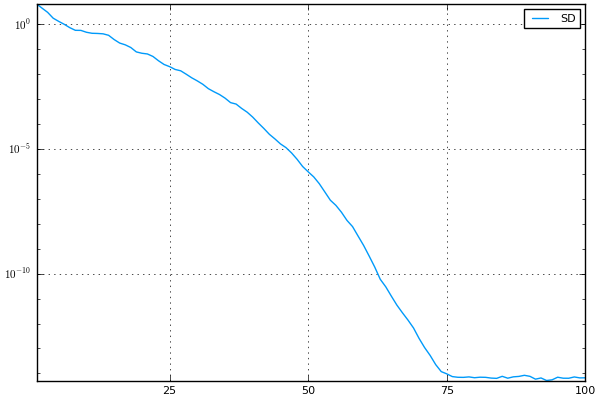

In [102]:
plot(err,yscale=:log10,label="SD")

Now implement a slight change to get CG. Note: this isn't the most efficient implementation since it requires multiple products with $A$, but it's transparent.

In [100]:
# Conjugate gradients
x = zeros(n)
err = []
g = A*x - b
p = -g
for i = 1:100
    α = -dot(p,g) / dot(p,A*p)
    x = x + α*p
    g = A*x - b
    γ = dot(g,A*p)/dot(p,A*p)
    p = -g + γ*p
    push!(err,norm(g))
end


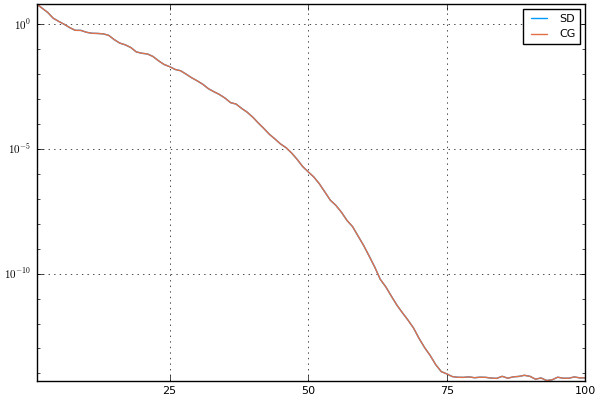

In [103]:
plot!(err,label="CG")